In [1]:
import numpy as np
import opmap
from opmap.opmap import RawCam, VmemMap, PhaseMap
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
cam = RawCam(
    path = "/Volumes/HD-PLFU3/ExperimentData/20161021-1/C001H001S0009/", 
    cam_type = 'sa4',
    image_width = 512,
    image_height = 512,
    frame_start = 0,
    frame_end = 800
)

In [3]:
vmem = VmemMap(cam)
vmem.smooth(3)

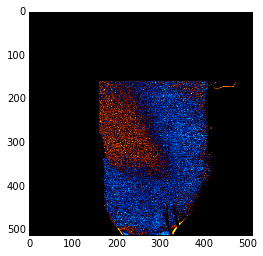

In [4]:
top=160; bottom=None;  left=160; right=None
vmem.setDiffRange(70)
vmem.setROI(top=top, bottom=bottom, left=left, right=right)
vmem.showFrame(300)

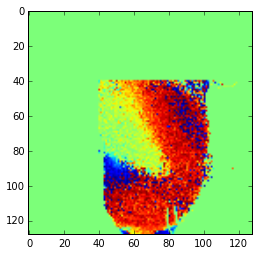

In [5]:
pmap = PhaseMap(vmem, shrink=4)
pmap.showFrame(300)

In [6]:
P = pmap.data[200:600,70:100,60:80].flatten()
V = vmem.data[200:600, 280:400:4,240:320:4].flatten()
print P.shape, V.shape

(240000,) (240000,)


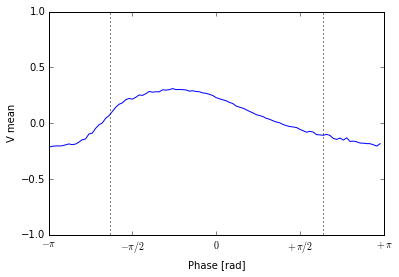

In [29]:
p_steps = 100
v_steps = 100

x = np.arange(-np.pi, np.pi, 2*np.pi/p_steps)
y = []
for i in range(len(x)): y.append([])

for p, v in zip(P, V):
    i = int((p+np.pi)/(2*np.pi/p_steps))
    y[i].append(v)
    
means = [ np.mean(np.array(vs)) for vs in y ]
stds = [ np.std(np.array(vs)) for vs in y ]

plt.plot(x, means)

plt.plot([-2, -2], [-0.99, 0.99], 'k:', lw=1)
plt.plot([2, 2], [-0.99, 0.99], 'k:', lw=1)

plt.xlim([-np.pi, np.pi])
plt.ylim([-1,1])
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.xlabel(r"Phase [rad]")
plt.ylabel(r"V mean")
plt.show()


<matplotlib.colorbar.Colorbar instance at 0x10db7e0e0>

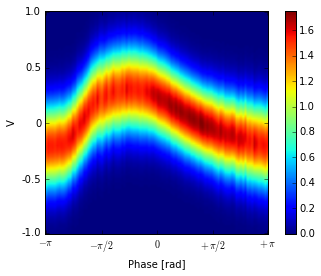

In [30]:
img = np.zeros((v_steps, p_steps), dtype=np.float32)
for i in range(v_steps):
    v = 1.0 - 2.0 * i / v_steps
    for j in range(p_steps):
        img[i, j] = float(mlab.normpdf(v, means[j], stds[j]))
plt.xticks([0,25,50,75,99], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([0,25,50,75,99], [r'1.0', r'0.5', r'0', r'-0.5', r'-1.0'])
plt.xlabel(r"Phase [rad]")
plt.ylabel(r"V")
plt.imshow(img)
plt.colorbar()

In [35]:
i =int (( 2.0 + np.pi ) / (2.0*np.pi/p_steps))
print (means[i] - np.min(means))/ (np.max(means) -  np.min(means))

0.209296812142
